# Завдання на практичну роботу #4

## Частина перша - Бінарна класифікація (Binary Classification):

Використовуйте набір даних "classification_dataset.csv" для бінарної класифікації.
Розділіть дані на навчальний та тестовий набори.
Навчіть класифікатор (наприклад, логістичну регресію або метод опорних векторів) та оцініть його ефективність за допомогою метрик, таких як точність, відгук, F1-середнє і AUC-ROC.
Візуалізуйте матрицю плутанини та навчіться розпізнавати типи помилок.

Бінарна класифікація: Де модель визначає, чи належить вхідний зразок одному з двох класів, наприклад, "позитивний" або "негативний", "хворий" або "здоровий".

### Підготовка даних

Імпорт бібліотек

In [280]:
# Імпорт необхідних бібліотек
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Завантаження даних з файлу

In [281]:
# Завантаження даних
data = pd.read_csv('classification_dataset.csv')

In [282]:
# Вибір цільової змінної (відгуку) та предикторів
X = data.drop(['Target'], axis=1)
y = data['Target']

# Розділення даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [283]:
# from sklearn.model_selection import cross_val_score

# # model - ваша модель
# scores = cross_val_score(data, X, y, cv=5, scoring='accuracy')  # розділення на 5 частин

# # Оцінка точності для кожного з k спроб
# for i, score in enumerate(scores):
#     print("Поточна спроба {}: {:.2f}".format(i + 1, score))

# # Оцінка середньої точності та її стандартного відхилення
# mean_accuracy = scores.mean()
# std_accuracy = scores.std()
# print("Середня точність: {:.2f}".format(mean_accuracy))
# print("Стандартне відхилення точності: {:.2f}".format(std_accuracy))

In [284]:
print(data.head())

   Feature1  Feature2  Target
0 -0.872929  0.013042       1
1  1.312935  2.770534       1
2  2.340428  2.420996       1
3  2.294548 -0.404380       1
4  0.944105  0.477241       1


Перевірка на пропущені значення

In [285]:
# Перевірка на пропущені значення
missing_values = data.isnull().sum()
non_zero_missing_values = missing_values[missing_values > 0]
print(non_zero_missing_values)

# Нема

Series([], dtype: int64)


In [286]:
# Стандартизація ознак
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Тренування, оцінка моделей

Тренування моделей

In [287]:
# # Створення та навчання моделі Логістичної регресії
# model = LogisticRegression()
# model.fit(X_train, y_train)

# # Прогнозування на тестовому наборі
# y_pred = model.predict(X_test)

In [288]:
# from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Побудова та навчання моделі лінійної регресії
# lr_model = LogisticRegression()
lr_model = LogisticRegression(penalty='l2', C=1.0, fit_intercept=True, solver='lbfgs', max_iter=200)
lr_model.fit(X_train, y_train)

# Побудова та навчання моделі дерева рішень
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Прогноз на тестових даних
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

Оцінка точності моделей

In [289]:
# Оцінка точності Логістичної моделі 
accuracy = accuracy_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1])
conf_matrix = confusion_matrix(y_test, y_pred_lr)

print("---Для Логістичної регресії---")
print("Точність: {:.2f}".format(accuracy))
print("Відгук: {:.2f}".format(recall))
print("F1-середнє: {:.2f}".format(f1))
print("AUC-ROC: {:.2f}".format(roc_auc))
print("Матриця плутанини:")
print(conf_matrix)


# Оцінка точності моделі Дерева рішень
accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
# roc_auc_dt = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("\n\n---Для моделі Дерева рішень---")
print("Точність: {:.2f}".format(accuracy_dt))
print("Відгук: {:.2f}".format(recall_dt))
print("F1-середнє: {:.2f}".format(f1_dt))
# print("AUC-ROC: {:.2f}".format(roc_auc_dt))
print("Матриця плутанини:")
print(conf_matrix_dt)

---Для Логістичної регресії---
Точність: 0.88
Відгук: 1.00
F1-середнє: 0.87
AUC-ROC: 0.93
Матриця плутанини:
[[18  5]
 [ 0 17]]


---Для моделі Дерева рішень---
Точність: 0.80
Відгук: 0.82
F1-середнє: 0.78
Матриця плутанини:
[[18  5]
 [ 3 14]]


### Візуалізація

Далі використовую модель Логістичної регресії (має кращі показники)

Гістограма

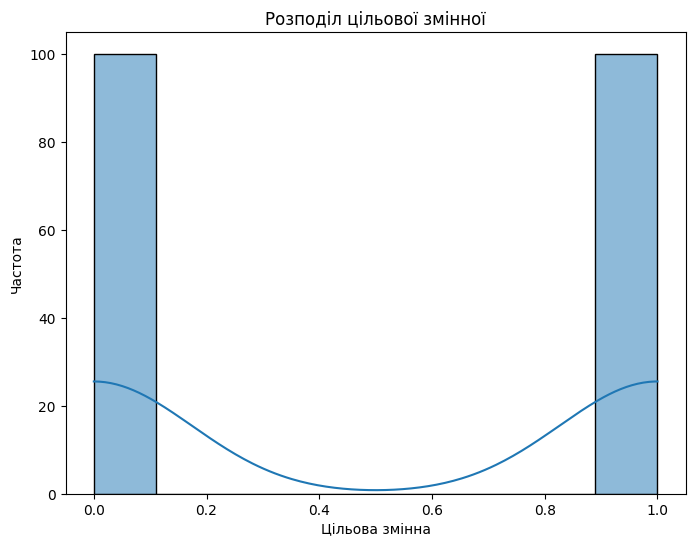

In [290]:
# Візуалізація розподілу цільової змінної (target)
plt.figure(figsize=(8, 6))
sns.histplot(data['Target'], kde=True)
plt.xlabel('Цільова змінна')
plt.ylabel('Частота')
plt.title('Розподіл цільової змінної')
plt.show()

Матриця кореляції

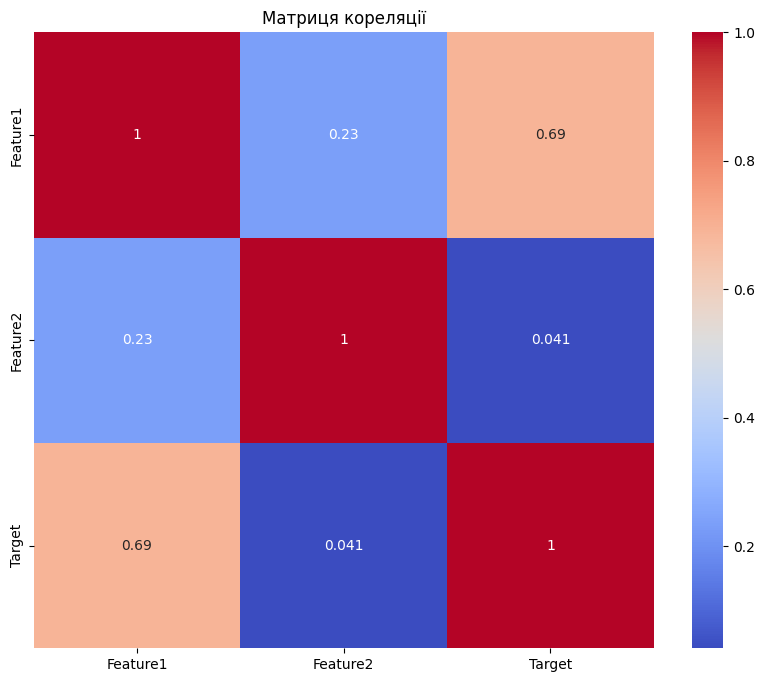

In [291]:
# Матриця кореляції
correlation_matrix = data.corr()

# Візуалізація матриці кореляції за допомогою теплової карти
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матриця кореляції')
plt.show()

Text(0.5, 1.0, 'Графік логістичної регресії')

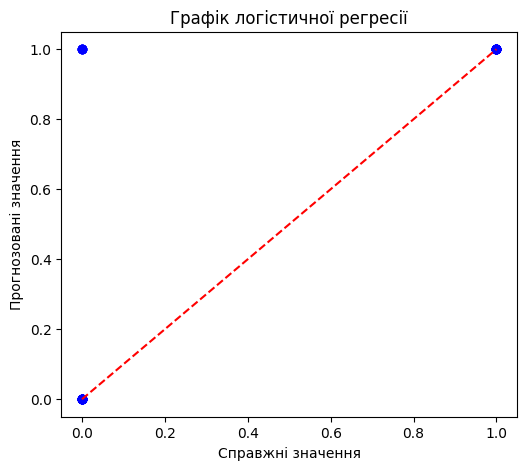

In [292]:
# Побудуємо діаграму розсіювання
# Візуалізація результатів
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_pred_lr), max(y_pred_lr)], linestyle='--', color='red')
plt.xlabel("Справжні значення")
plt.ylabel("Прогнозовані значення")
plt.title("Графік логістичної регресії")